In [1]:
pip install torch torchvision grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.0-py3-none-any.whl size=38071 sha256=dbd0984bab7ca2ceb4cff1f310a3c0b35aaad48b8cd000c1a3e132998b0df635
  Stored in directory: /root/.cache/pip/wheels/5b/e5/3d/8548241d5cffe53ad1476c566a61ad9bf09cc61a9430f09726
Successfully built grad-cam
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import numpy as np
from PIL import Image
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import preprocess_image, show_cam_on_image
from torchvision.models import resnet50
import matplotlib.pyplot as plt

In [3]:
image_path = '/kaggle/input/gradcam/SRI_RAM_P_18Y.png'


img_pil = Image.open(image_path)
img_pil = img_pil.convert('RGB')  # Convert to RGB since GradCam expects RGB

# Image Tensor Creation
img_tensor = preprocess_image(img_pil, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [4]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = resnet50(pretrained=True)
model = model.to(device)

# GPTed i dont understand this part
# Move the input tensor to the same device as the model
img_tensor = img_tensor.to(device)

# Ensure the input tensor is a 4D tensor with dimensions [batch_size, channels, height, width]
if len(img_tensor.shape) == 3:
    img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension if it's missing

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 133MB/s]


In [5]:
# from https://github.com/jacobgil/pytorch-grad-cam
# Define the target layers
target_layers = [model.layer4[-1]]

# Create the GradCAM object
cam = GradCAM(model=model, target_layers=target_layers)

# Specify the target category
targets = [ClassifierOutputTarget(281)]  # 281 is the index for a dog in the ImageNet dataset

# Generate the CAM with aug_smooth=True to apply a smoothing technique
grayscale_cam = cam(input_tensor=img_tensor, targets=targets, aug_smooth=True)[0, :]

# Convert the PIL image to a NumPy array and scale it to [0, 1]
img_np = np.array(img_pil) / 255.0

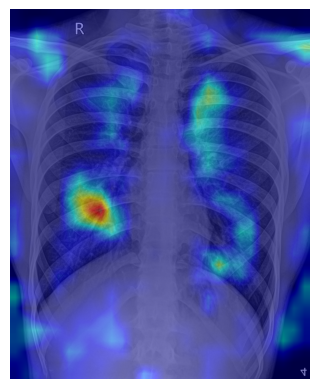

In [6]:
# Visualize the CAM
visualization = show_cam_on_image(img_np, grayscale_cam, use_rgb=True)

plt.imshow(visualization)
plt.axis('off')  # Optional: turn off the axis
plt.show()